In [1]:
from QHD import *

import matplotlib.pyplot as plt
import numpy as np

# The Double Well Potential

**1. The Potential**

We first must define the potential along with its parameters, as described below.

**Parameters**

$m=1836$ This is mass

$\lambda=m$ This is a constant which can be set equal to the mass, `m`, or any other value

$B=2$ This is simply a constant which can be changed as well




**Potential**

$V(q)=m*\lambda*(q^2 - B)^2$

In [24]:
m = lam = 1836
B = 4
q = np.linspace(-5, 5, 1000)

potential = m*lam*(q**2 - B)**2 

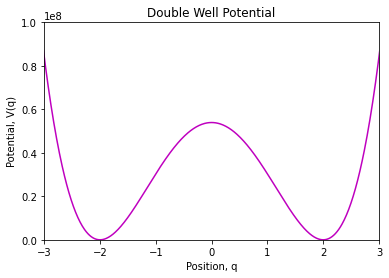

In [25]:
plt.plot(q, potential, "m")
plt.title("Double Well Potential")
plt.ylabel("Potential, V(q)")
plt.xlabel("Position, q")
plt.ylim(0, 1e8)
plt.xlim(-3, 3)
plt.savefig('doublewell_vVq.png')
plt.show()

New potential given by: https://web.physics.ucsb.edu/~davidgrabovsky/files-teaching/Double%20Well%20Solutions.pdf

And this one: https://arxiv.org/pdf/math-ph/0611033.pdf#:~:text=Ammonia%20(NH3)%2C%20cyanamide%20(,can%20tunnel%20through%20the%20barrier.

### 2. Derivation of  QHD formulas

Here, we use the pysces library, able to derive the equations of motion in the QHD method. We will need to define the `q`, `p`, and `p2` variables. In order to do this, we must first calculate the first and second derivatives of the potential of interest, defined in section 1. We will also use a change of variables as well, described below.

Please note that because the potential is quadratic, we do not need a change of variables. 

**2.1 The First and Second Derivatives of the Potential**

To take the derivatives, we must represent the potential symbollically. This can be done by:

In [4]:
# First, we must define all the parameters as stated in section 1 as symbols:

m, q, B = symbols("m, q, B")

# When computing symbolically, we do not need to use the numpy exponential function.

potential_sym = m*(q**2 - B)**2

Now that the potential is represented symbolically, we may take the first and second derivatives, described by diff1 and diff2, respectively

In [5]:
diff1 = diff(potential_sym, q)
diff2 = diff(diff1, q)

diff1, diff2

**2.2 Solving for the Equations of Motion**

In [6]:
# Again, we must first define all variables as symbols. #

q, p, x, x2, xp, dt, mass, alpha, D = symbols("q, p, x, x2, xp, dt, mass, alpha, D")



########## EOM Calculations ##########

q1 = QHD_int(q, 1, dt)

#print(q1)

p1 = sympify(str(QHD_int(p, 1, dt)).replace("Derivative(v(q), q)", str(diff1)))

#print(p1)

p21 = sympify(str(QHD_int(p, 2, dt)).replace("Derivative(v(q), (q, 2))", str(diff2)).replace("Derivative(v(q), q)", str(diff1)))

#print(p21)

Now, we are ready to make plots of the data based on the EOM's as computed above.

# 3. Graphing

**3.1 Generating Time-Dependent Values**

We will first define all of the parameters necessary to perform the QHD calculations, starting with the potential specific parameters. These parameters are also defined in part 1.

In [28]:
### Parameters: ###

q0 = -2.5
p0 = 0.0
s0 = 0.05
ps0 = 0.0

#omega = 1/2000*10**8 # angstrom (-1)
#m = 1/1836 # mass au
#D = 1/2000*10**8 # angstrom (-1)
#C = 0
#B = ((m*omega**2)/4)
#A = (B**2/(4*D))


m = 1836
mass = 1836
B = 2

hbar = 0.6582  # eV * fs

q_list = []
p_list = []

Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,p2,x,x2,xp = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2

p = eval(str(p1))

q = eval(str(q1))

p = eval(str(p1))

In [29]:
### Time how long it takes to compute ###

import time 
begin = time.time()


### Compute the y values ###

dt = 0.1
t_i = 0.0
t_f = 1000

y_list = []

while t_i <= t_f:
    
    p = eval(str(p1))
    
    q = eval(str(q1))

    p = eval(str(p1))

    q_list.append(q)
    p_list.append(p)
    
    print(q)
    
    t_i = t_i + dt

    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

-1.2672662499999998
-0.49948040743544386
0.19835742677151746
0.9273080888132073
1.7408366453887312
2.4108489262508885
2.3456115827715047
1.6232476458631973
0.8184314395671247
0.10070746771580397
-0.6009850192640874
-1.3814698638674925
-2.1720716007782945
-2.490396327456506
-1.9715347078873475
-1.1550582362101638
-0.40010852613201553
0.2959479882992624
1.037282527479976
1.8552967218391703
2.4592651959494285
2.26682812031072
1.5052340762637253
0.7116412093657213
0.0030790365546553566
-0.7049904927429219
-1.497827424946741
-2.261488237261527
-2.4617075689868657
-1.8623634639928643
-1.0442441450009552
-0.30210855497077693
0.39389553191370996
1.148033756282376
1.9648104009727712
2.4891478231473156
2.1779566027036377
1.3887483446825915
0.6074701769134863
-0.09454625489398272
-0.8116224756096926
-1.6157870188380357
-2.3410019216324285
-2.41442757874537
-1.748176826049737
-0.9342230027957517
-0.20451571944221336
0.49315338587653945
1.2601322303233706
2.068651763407603
2.499961729932874
2.08132

2.498204570861601
2.0310185477937006
1.2185534667829465
0.45630521283746706
-0.240534954067939
-0.9747473819232035
-1.7908282607687724
-2.433977327300444
-2.3130044026543755
-1.5721482656867845
-0.7719718090648764
-0.058506902229209845
0.645612922049529
1.4315026678685663
2.211758031999987
2.48032342454003
1.9250237370739673
1.107040486712692
0.3576460428935667
-0.33818477428952043
-1.085030928583921
-1.9032901628261243
-2.4745002869204584
-2.2294912117863186
-1.4546424687016153
-0.6662964226223403
0.039106428771846335
0.7507615242926516
1.5486855534999786
2.2972465385706076
2.4434985810978174
1.8135615088082808
0.9966091980729381
0.2599253952015802
-0.43657521439655267
-1.1962710321510812
-2.010414945788582
-2.496174746291597
-2.137051611702174
-1.339065337685728
-0.5632437039329664
0.1367537681587352
0.8584272420896133
1.6668432553418602
2.371466080821107
2.3885816573575345
1.6976600369926156
0.8869447879392551
0.1623220014603285
-0.5366714192044049
-1.309166661393815
-2.111624293288

2.4184580556329607
1.7566000881898391
0.9421787513480302
0.21159618825504456
-0.4858888875089431
-1.2519391819926606
-2.061321423636544
-2.4998231271733964
-2.088561821527942
-1.2826307558490124
-0.5131118682642178
0.18511664336141453
0.9124563292120836
1.7250138481301098
2.4029274430274423
2.355337593285529
1.6392812318584853
0.8330981119242867
0.11395358610507123
-0.5870767447494704
-1.3658520471673627
-2.1593182559100477
-2.492822843538586
-1.9859139434570268
-1.170178872048193
-0.4134846052751321
0.28270758577349975
1.0223253903794356
1.8400366520225306
2.453763676014999
2.2781726030663823
1.5211790494408175
0.7259752182664362
0.016317982673359266
-0.6907287232996817
-1.4819279501907643
-2.2498774525600544
-2.466706234368982
-1.877486529649633
-1.05922012677908
-0.31535781323672163
0.38055625083493705
1.1329502493788337
1.9502780436283502
2.4862065460611853
2.190504331095805
1.4044254380407457
0.621446301691617
-0.08130140789588458
-0.7970143510895477
-1.5997464767522458
-2.3309137

1.9895790073163622
2.4933876039976606
2.1560306001830747
1.3618593610494403
0.5835226329244131
-0.11734556804629204
-0.8368597921924289
-1.6433850529590799
-2.357786823772373
-2.400849594461055
-1.7209534050684927
-0.9086566123369985
-0.1817257938666852
0.5166090064346143
1.2865712377483676
2.0920155033250456
2.499720950334508
2.0578002771762383
1.2480203154305847
0.4824148107427516
-0.2149858864946118
-0.9459894121360638
-1.7606262748735566
-2.4203555081257484
-2.333042829800429
-1.6031002519721484
-0.8000652264239427
-0.08407061750796685
0.6185202286138098
1.4011442635311884
2.187892678990714
2.4868505311021973
1.9533251083097887
1.1361020316927624
0.38334339967025144
-0.31258693971678675
-1.0560877449919577
-1.8743324148106622
-2.4656895954748848
-2.2523196271148036
-1.4852495455883385
-0.6937065661598566
0.013549888950164735
0.7229741272719958
1.5178428263432506
2.2758161850367955
2.4549421953269994
1.8432348585510272
1.0254516904894608
0.28547559895194086
-0.4106856135595385
-1.16

1.9081409826308233
2.4758596581576557
2.2255778635251957
1.4494905101772493
0.6616886366990047
-0.0434197238043047
-0.7554686914756976
-1.5538989801644294
-2.3007892938136294
-2.4414434631203212
-1.8085221336498707
-0.9917461101613013
-0.2556140924372555
0.4409557871210342
1.2012193663873818
2.0150162028931264
2.496691572760791
2.132793670611559
1.3340090992992666
0.558747881277323
-0.14106892683215355
-0.8632321765137336
-1.6720522112227232
-2.3744282521873155
-2.385767880787782
-1.6924684118810385
-0.8821246888464168
-0.158007315668934
0.541144475794355
1.314201998517524
2.1159483518553097
2.498358189006157
2.0329664359167956
1.2206770106668001
0.45818609385335685
-0.2386901733005492
-0.9726689565854036
-1.788656579991634
-2.4330344295498687
-2.3144795349018903
-1.5743821748420883
-0.7739948906980535
-0.060352737747299545
0.6436505637245158
1.4293055195157645
2.2100534672840237
2.4808384148065774
1.9270801495191816
1.1091364773757282
0.3594993101111509
-0.3363348957269455
-1.08293895

0.7882037303132895
1.590050487924191
2.3247003693851673
2.4262447356316694
1.7733893500597242
0.9581042986576255
0.2257555264067661
-0.47139282212364275
-1.2355841212932153
-2.0465627287868977
-2.4992423949828524
-2.1029369075573547
-1.2991085531410589
-0.5277388901906113
0.1709509247505686
0.8965932150752575
1.7080301950288983
2.3941159120044317
2.365454411888364
1.6564173397588797
0.848827622879091
0.12812333559013867
-0.5722494756071179
-1.3491906646537384
-2.1455261511401433
-2.49502878899075
-2.001178031658671
-1.1863841827447468
-0.42782423899472444
0.2685483226639689
1.0063392381829186
1.8236133496415972
2.447501924034164
2.29009586641018
1.538265366430738
0.7413624190619974
0.030480154319480035
-0.6755275511140563
-1.464958181913525
-2.2372660914497366
-2.4716708773826483
-1.8935569829283354
-1.0752555274448325
-0.32954031896842095
0.36631140097731796
1.116840693512081
1.934618704754242
2.4826722484902
2.2037652448797975
1.4212394822349443
0.6364486429439288
-0.0671347545130358

1.8453647928184753
1.0275361860365644
0.2873210360753711
-0.4088202938763873
-1.16490664809964
-1.980915101470216
-2.492017197764236
-2.1637780546716683
-1.3712898624775725
-0.5919182347765851
0.10933757396584587
0.8279828266667318
1.6336950731186917
2.35197724041423
2.4057229261661
1.7305340268924727
0.917629504120005
0.1897309553928912
-0.5083570327680822
-1.2772722967138501
-2.083849260652615
-2.4999249192737643
-2.0661011826858338
-1.2572760984773734
-0.49062073979689325
0.20698303535865914
0.9369946911775996
1.7511140599741766
2.4158423229005432
2.3391400482095563
1.612797546455882
0.808896781473962
0.09207770223476452
-0.6100713976614309
-1.3916670643403772
-2.1803059894313255
-2.488626259640399
-1.9621098424558339
-1.1452207843709439
-0.39140767947003485
0.3045772883443505
1.047034236680546
1.865189189417325
2.4626652960328923
2.2593377411003295
1.4948617197309781
0.7023287510240097
-0.00554639072752483
-0.714308941345818
-1.5082035594067102
-2.268956553306849
-2.458265789010714

-2.4967262104228105
-2.0153365822865403
-1.201564498571717
-0.4412613386907699
0.25531350200811354
0.9914070944985409
1.808170449061749
2.4412988519553855
2.301035480269404
1.5542625477225682
0.755797072614237
0.0437204596467633
-0.6613675654350392
-1.449131453775735
-2.225304380676084
-2.4759530591082446
-1.9084787975374153
-1.090262282779388
-0.34281060690771914
0.3530143157130692
1.1018021425425804
1.9198741121188265
2.479006269872035
2.2160063241905
1.436998841256408
0.6505229109475817
-0.053892419447148954
-0.7669180149727036
-1.5665646540301665
-2.3092980223597053
-2.4363065185940664
-1.796250835808999
-0.979944568751943
-0.24514684865348257
0.4516059824303703
1.2132474410742038
2.0261394461940507
2.497790495622632
2.122399352634058
1.321750859739875
0.5478519252985943
-0.15154535915634315
-0.874911469868752
-1.6846859315259408
-2.381496582995327
-2.3788091093920207
-1.679847486721399
-0.8704342013825376
-0.14753123360674736
0.5520236236627772
1.3264448044305208
2.12639147150684


-2.188176688328118
-1.4015006108736987
-0.6188379869178672
0.08376979724750855
0.7997337214196656
1.6027359277967967
2.332812052589175
2.4205227975123997
1.7609831805591365
0.9463274640848779
0.21528654195151642
-0.4821067866045793
-1.2476728320762982
-2.0574875949467106
-2.4997107676361177
-2.092321461501846
-1.2869208747558702
-0.5169193283413945
0.18142502435064867
0.9083196519919438
1.7205930867484662
2.400664329084074
2.3580032413159704
1.643749009852867
0.8371935628172766
0.11764643307934608
-0.5832075319268314
-1.3615053439777234
-2.1557385629369232
-2.4934365826756673
-1.9899037571801788
-1.1743990798955197
-0.4172185184565209
0.2790171413585335
1.0181578124191608
1.8357662500704146
2.4521691663864478
2.281301480705179
1.5256291967330764
0.7299800031665707
0.02000880755166745
-0.6867616197008665
-1.4775014824440256
-2.246609466943152
-2.4680382592496
-1.8816854644871503
-1.063397596530898
-0.3190529147033644
0.3768415340227592
1.128749420707368
1.9462082782464747
2.485324061430

0.8921040249336777
0.16693735536825682
-0.5318915152324387
-1.3037848942380528
-2.106984229348773
-2.4990043207099646
-2.0423580275724214
-1.2309580152667081
-0.4672938028894791
0.22976659378503062
0.9626192457842566
1.7781311797645534
2.428383531846151
2.321553985349743
1.5851908906300545
0.7837931000979929
0.06928149455152677
-0.6341716755476146
-1.418688539485495
-2.2017666067253567
-2.483233592393187
-1.9369992738593627
-1.1192803767725097
-0.36846860768932665
0.32739031670091756
1.072824400480466
1.891128820513258
2.4709440113784655
2.2391896391542394
1.4675271921826938
0.6778275375751577
-0.02833394924761834
-0.7390270482017148
-1.5356742560364942
-2.2883034595870377
-2.448475753795405
-1.8261086318607047
-1.0087609177065604
-0.2706938554583034
0.4256490008354611
1.1839262700922006
1.9988727467902732
2.4947204162348156
2.1476260152949163
1.3517125684298241
0.5744931044239135
-0.12597602615794024
-0.8464413821737773
-1.6538218438665144
-2.363940819159361
-2.3954733356645015
-1.710

-1.7693775035673824
-0.9542903672962377
-0.22236619306486582
0.4748590126549256
1.2394955425984377
2.0501075205236883
2.4994182508445912
2.0995083219902444
1.2951599948287493
0.5242330732049169
-0.1743421485728125
-0.9003881811766805
-1.712100827795512
-2.396256587495088
-2.3630602272702075
-1.6523170987519733
-0.845058586611421
-0.12473131787933844
0.5757941845982482
1.3531749009829839
2.148841631356015
2.494537424665947
1.9975351781260828
1.1825018741168267
0.4243884697738408
-0.27193755769659134
-1.0101648110394983
-1.8275539978661994
-2.449036177791953
-2.2872620822844487
-1.5341725811065803
-0.7376739111560435
-0.02708989095914005
0.6791613371040423
1.4690167758169934
2.2403026334673273
2.470518504748478
1.8897201344568306
1.0714153600015572
0.32614418152687785
-0.36971928513884655
-1.1206948135985202
-1.9383779646369228
-2.4835547715158297
-2.2006062730426823
-1.4172103373967797
-0.6328523834529911
0.07052588781011127
0.7851602380209575
1.5866975932355558
2.3225318000511925
2.427

-2.424588683861601
-2.3270927838162563
-1.593767961467015
-0.7915800828816646
-0.07636475274034005
0.626667843107984
1.4102792659359618
2.1951444148545685
2.4850204785117844
1.9448347382204692
1.1273338987622448
0.3755898396273858
-0.3202985335829033
-1.0648058885584024
-1.8830990459249772
-2.4684811705948877
-2.245504969660123
-1.4760101221390136
-0.6854253476000624
0.021252831167012043
0.7313306949576898
1.527129608955546
2.2823527084793342
2.4516257746940493
1.834325319323499
1.0167533169956566
0.27777331145973194
-0.41847755917497564
-1.1758220199778804
-1.9912466870609888
-2.4936372803159985
-2.154529648033674
-1.3600409733341032
-0.5819041855931167
0.11889113406182117
0.8385745921043987
1.6452546397816485
2.358897139435617
2.399896210721323
1.7191021478165776
0.9069257452622619
0.18018070985028312
-0.5182033785966594
-1.2883675587901076
-2.0935865745961753
-2.499666702348006
-2.056193382304076
-1.2462354669033466
-0.48083267887355663
0.21653036426803685
0.9477260966966323
1.76245

-0.2356017662769515
0.4613364382595978
1.2242335258643284
2.0362226005834527
2.498599995828472
2.1128522208758524
1.3105945903453633
0.5379398127430665
-0.16109808404636516
-0.8855772012466286
-1.696187771040379
-2.387786621138687
-2.3723093313283736
-1.6683211521753813
-0.8597899013697082
-0.1379778390204095
0.5619679135738014
1.3376306181942061
2.1358451682099338
2.4963251570315723
2.0117213367185434
1.197674371126827
0.437817485597933
-0.2587024160662027
-0.9952295714130729
-1.812132908054408
-2.4429192241751823
-2.298253729435012
-1.5501642136373577
-0.75209627640663
-0.04032995436166298
0.6649888227359375
1.453180627739093
2.2283828653445394
2.474889645871557
1.9046672496263093
1.0864179669637215
0.33941128134098764
-0.35641761412210526
-1.1056511692396285
-1.923659366421938
-2.479978274545312
-2.212886415171768
-1.4329596716495696
-0.6469143713897235
0.0572832296486091
0.7706311100403543
1.570667449978326
2.312024126640231
2.434598885355595
1.7922671334617655
0.9761254045331106
0

-0.6996687240976942
0.008013750686926002
0.7169783844098807
1.5111740814789216
2.2710785663353374
2.457254489263635
1.8496193376606926
1.0317058917960862
0.29101216150764253
-0.40509124379357875
-1.1606912453893021
-1.9769067996447474
-2.491341917391854
-2.1673339403196548
-1.3756436634566147
-0.5957954237119876
0.10564481259949565
0.8238938922535728
1.6292251852289434
2.349266578313612
2.407932397683401
1.7349453705852098
0.921769838777205
0.19342223114190038
-0.5045567269796848
-1.2729888585787632
-2.080068867351611
-2.499975425082726
-2.0699149128406336
-1.2615488446489476
-0.49440963888699707
0.20329233926588008
0.9328489620934648
1.7467196692288094
2.41372204994206
2.3419219323819873
1.6172692330752918
0.8129744633060442
0.09577023472965895
-0.6061810281813245
-1.3873016943389542
-2.176789899398036
-2.489401903268289
-1.9661480601963988
-1.149428814550527
-0.39512938346353266
0.3008845827496047
1.0428609188208753
1.8609611883388086
2.461228276976062
2.262552189238219
1.49929830261

1.4227186349746346
2.2049219630360657
2.4823426522012975
1.9332375586773796
1.1154267569074783
0.36506118433534185
-0.3307867253790291
-1.0766649402407875
-1.8949633088133595
-2.472088038336243
-2.236149089572946
-1.463469466122822
-0.6741949327211701
0.03172423229400945
0.7427167202265325
1.5397676087631567
2.2911324481161395
2.446933373143388
1.8221658931605846
1.0049356331199106
0.26730466629706395
-0.42908550555387637
-1.187809293653992
-2.0025130211515254
-2.495203299126057
-2.1443073600972373
-1.3477293065773073
-0.5709494737897037
0.12936804275351466
0.850211236915735
1.6579215913998393
2.3663285432821723
2.3933254881127284
1.706535719775024
0.8952010410529192
0.1697064808786921
-0.5290260500193577
-1.3005581281471157
-2.1041930327978404
-2.4991720497972745
-2.0452601088128426
-1.2341493944572743
-0.4701215063712123
0.22699922414273188
0.9595040734744763
1.7748603289192215
2.426911090968578
2.323727033155641
1.588543630140078
0.7868357224897089
0.07205047271606957
-0.63123662410

1.4278248243451535
0.642328242079861
-0.06159705059296838
-0.7753591744548725
-1.5758882172330095
-2.315471526367212
-2.4323952023664033
-1.7871917805209878
-0.9712680133113327
-0.23744657606519004
0.4594544046966772
1.222108884871654
2.0342783162600853
2.4984578710470866
2.114702452027362
1.312749150161037
0.5398537784956591
-0.15925187821534603
-0.8835147304425982
-1.6939663333027228
-2.386582664990434
-2.373576845900002
-1.6705500127875075
-0.8618458771009263
-0.13982424741948674
0.5600441969721313
1.3354671061758396
2.1340232552590197
2.4965463397643397
2.0136901756195873
1.199791703677075
0.4396918790372618
-0.2568576584473451
-0.993148708958183
-1.8099766228350922
-2.4420398967514103
-2.2997696616507968
-1.55239498069666
-0.754110415918395
-0.04217556478885709
0.6630171976527013
1.4509761576184301
2.2267084019909085
2.4754713439051863
1.9067428726276512
1.0885104789529882
0.34126158975976983
-0.35456489665408863
-1.10355580054536
-1.9215996865074088
-2.479452002555555
-2.21458599

1.0477143513279334
0.3051790431708632
-0.3908014277436933
-1.1445352916196954
-1.9614510714517808
-2.48849728733215
-2.1808778725043267
-1.3923786737041957
-0.6107056535703518
0.09147603260622783
0.8082326472758334
1.612068893165231
2.3386849606237265
2.4161854818791224
1.7518296362584247
0.937670343320234
0.20758439823998287
-0.4900036493558604
-1.256580150556593
-2.0654789070804647
-2.4999140848507295
-2.08446438449222
-1.2779705379782125
-0.5089765698781953
0.1891294685565188
0.9169550097406595
1.7298148146332486
2.4053606335371507
2.3524170495198726
1.6344233399020704
0.8286493743221424
0.10993929249934264
-0.5912868063262572
-1.3705807345746086
-2.163197634077019
-2.492124640274848
-1.981567454805098
-1.1655937223139765
-0.4094281212713974
0.28671962065862455
1.0268568469367882
1.8446708660789377
2.4554669770513815
2.274754490091345
1.51634389876993
0.721626112359684
0.012305892262743257
-0.6950455341555667
-1.4867427771004054
-2.2534146797225993
-2.465227795631919
-1.872913565139

1.7872160518448266
2.432405815429637
2.3154551089506947
1.5758632673142323
0.7753365705039401
0.06157643726306017
-0.6423501441571646
-1.4278493506728158
-2.2089217937657106
-2.481176083452715
-1.9284423510176512
-1.1105262120059707
-0.36072811014266193
0.335108667071053
1.081552273227736
1.8998321210874312
2.473510545759745
2.2322653113957576
1.4583107793840826
0.6695782708444574
-0.0360373475409137
-0.7474151974241964
-1.5449772260078674
-2.294712367461738
-2.4449392444071036
-1.8171418759203766
-1.000070341333207
-0.2629931782518564
0.4334602788272952
1.192752028202783
2.007133902073096
2.495784196811711
2.1400730100189165
1.3426657364875605
0.5664455907957004
-0.13368326647150208
-0.8550103197745287
-1.6631351036564643
-2.3693405238419154
-2.3905649512806533
-1.7013515738635347
-0.8903762511205361
-0.1653920514712799
0.5334913576983982
1.3055862968101755
2.1085394909848167
2.4989040034959737
2.0407364307028453
1.229177766062254
0.46571653431448923
-0.23131086310193505
-0.9643579008

1.1736877038795759
0.4165890939526957
-0.27963906638409
-1.018860099918658
-1.836486419963101
-2.4524397373891738
-2.280775225989608
-1.5248790775091543
-0.7293048189668291
-0.019386797689419755
0.6874299188766966
1.4782472777301614
2.247161149350613
2.467815658337023
1.8809783530481432
1.0626934984516254
0.31843013682242993
-0.3774674509195408
-1.1294572551900308
-1.9468947078192929
-2.485474692890363
-2.193392243929596
-1.4080650927613347
-0.6246926394696336
0.07823144062545584
0.7936342481165506
1.596028555055205
2.3285414349959233
2.4235732119876596
1.7675479655996151
0.9525528756460407
0.22082180568421095
-0.4764391971666243
-1.2412785526721801
-2.0517202533309744
-2.499490690644259
-2.097943446867194
-1.293361679497445
-0.5226365580484346
0.17588732518967232
0.9021178754935604
1.7139546012748421
2.3972254842186365
2.3619635029500285
1.6504483956337639
0.8433419702853647
0.12318574295746221
-0.5774103103014611
-1.3549912022417494
-2.150349453212529
-2.494305870287265
-1.9958729820

2.335391033032864
1.6068184465182767
0.8034496799201943
0.08714070313344757
-0.6152786974012235
-1.3975087095760372
-2.18498993414203
-2.4875465517185984
-1.9566978914785902
-1.139597378774343
-0.3864344614983656
0.3095154918369619
1.0526158011063114
1.870830771859381
2.4645448860428356
2.255018179416387
1.4889336850488628
0.6970104119826149
-0.010481119000916306
-0.7196495369132876
-1.514145622726573
-2.2731941099509325
-2.4562313109266225
-1.846775844182428
-1.0289182213169836
-0.2885445028400937
0.4075839846266812
1.163509128112534
1.9795873685582488
2.491796390342133
2.1649579137084247
1.3727326766480523
0.5932030203055647
-0.10811352126772367
-0.8266271311628017
-1.6322135156077981
-2.351080923430393
-2.4064579640111314
Total runtime is 10.438501119613647


For the x values, we create a range with `(t_i, t_f, dt)` as the parameters. Due to the increasing nature of `t_i`, the initial value of `0.0` is used in its place.

In [30]:
x_list = np.arange(0, t_f, dt)

**3.2 Graphing Position versus Time**

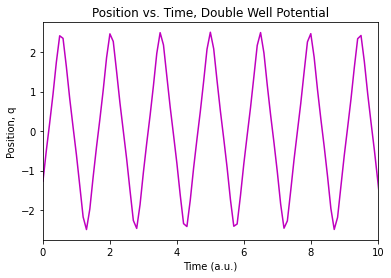

In [35]:
x_list = np.arange(0, 1000, 0.1)
plt.plot(x_list, q_list, "m")
#plt.plot([0, 1000], [0, 0], "k-")
plt.title("Position vs. Time, Double Well Potential")
plt.xlim(0, 10)
plt.xlabel("Time (a.u.)")
#plt.ylim(-0.5, 0.5)
plt.ylabel("Position, q")
#plt.savefig('doublewell_qVt_B2.png')
plt.show()

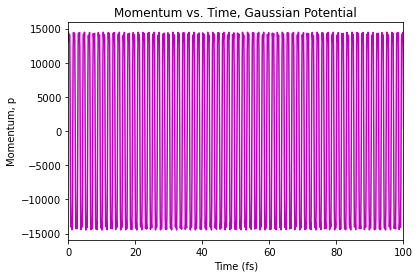

In [34]:
plt.plot(x_list, p_list, 'm')
plt.title("Momentum vs. Time, Gaussian Potential")
plt.xlim(0, 100)
plt.xlabel("Time (fs)")
#plt.ylim(-0.5, 0.5)
plt.ylabel("Momentum, p")
plt.savefig('double_well_pvt_B2.png')
plt.show()